In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep
import matplotlib as mpl

sys.path.append("../../../analysisTools/")
import plotTools as ptools

## df saving functions

In [2]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [3]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

## Signal

In [4]:
prefix = './coffea/skimmed/'
suffix = 'SR_BDTLxy_BestVertex_allMass'

In [5]:
# Signal
sig_histo = util.load(f'{prefix}/{suffix}.coffea')[0]

In [6]:
si = utils.get_signal_point_dict(sig_histo)

pd.options.display.float_format = '{:,.1f}'.format
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,88.0,16.0,100.0,80.0,96.0,0.2,sig_2018_Mchi-88p0_dMchi-16p0_ctau-100
...,...,...,...,...,...,...,...
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,31.5,3.0,10.0,30.0,33.0,0.1,sig_2018_Mchi-31p5_dMchi-3p0_ctau-10
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.5,1.0,10.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,105.0,10.0,1.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.0,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100


In [7]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)

cutnames

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75']

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
purity = {'ct-1': [], 'ct-10': [], 'ct-100': []}

In [10]:
m1 = 100
delta = 0.2

## Purity denominator: n(Events)

In [11]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [12]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [13]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [14]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.40,0.43,0.42,0.42,0.42,0.44


In [15]:
purity

{'ct-1': [0.6795307397842407],
 'ct-10': [0.6137236952781677],
 'ct-100': [0.44065287709236145]}

## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1)

In [16]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructed')

In [17]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [18]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [19]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.73,0.75,0.74,0.74,0.74,0.76


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx`)

In [20]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx')

In [21]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [22]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [23]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.73,0.75,0.74,0.74,0.74,0.76


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx` AND pass electron pT, eta)

In [24]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx_pteta')

In [25]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [26]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [27]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.74,0.75,0.74,0.74,0.74,0.76


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx` AND pass electron pT, eta AND jet overlap removal)

In [28]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx_ptetaoverlap')

In [29]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [30]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [31]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.78,0.78,0.78,0.78,0.78,0.78


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `vtx` AND pass electron pT, eta AND jet overlap removal AND electron ID)

In [32]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedVtx_ecuts')

In [33]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [34]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [35]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.98,0.98,0.98,0.98,0.98,0.98


## Purity denominator: n(Events where gen e+/e- are reconstructed with dR(reco, gen) < 0.1 AND form a `GoodVtx` -- pass electron pT, eta, jet overlap removal, ID for both electrons and OSSF)

In [36]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_genEEreconstructedGoodVtx')

In [37]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [38]:
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct) & (si["m1"] == m1) & (si["delta"] == delta)
    
    df = table.loc[list(si[points].name)]
    df = df.drop(columns='Preselections')  # dummy value stored at this cut step

    purity[f'ct-{ct}'].append(df.iloc[:,-1][0])

In [39]:
df

,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.99,0.99,0.99,0.99,0.99,0.99


In [40]:
prefix = './coffea/skimmed/'
suffix = '_SR_BDTLxy_BestVertex'

In [41]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [42]:
# efficiency
pd.options.display.float_format = '{:,.6f}'.format
bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow')

bkg_eff_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
QCD,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Top,0.000129,0.000013,0.000008,0.000007,0.000007,0.000007,0.000007
DY,0.000011,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
Diboson,0.000637,0.000044,0.000033,0.000031,0.000030,0.000030,0.000027
Triboson,0.001933,0.000158,0.000104,0.000092,0.000091,0.000091,0.000076
W+jets,0.002310,0.000173,0.000139,0.000132,0.000131,0.000131,0.000114
Z+jets,0.006645,0.000398,0.000325,0.000310,0.000309,0.000309,0.000292
Total,0.000019,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

bkg_cts_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
QCD,"38,039.83","1,882.67","1,326.86","1,319.01","1,319.01","1,318.41",632.25
Top,"5,667.49",559.22,349.76,314.03,312.99,312.95,294.00
DY,"14,495.72",671.44,623.25,623.25,623.25,623.25,455.65
Diboson,"4,424.20",307.91,227.24,213.36,211.27,210.33,189.35
Triboson,53.00,4.32,2.85,2.51,2.51,2.50,2.09
W+jets,"227,212.60","17,009.81","13,645.63","12,937.21","12,911.49","12,907.15","11,204.39"
Z+jets,"142,220.15","8,524.55","6,957.67","6,625.48","6,613.11","6,612.30","6,256.76"
Total,"432,113.00","28,959.92","23,133.27","22,034.86","21,993.63","21,986.91","19,034.50"


In [44]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

bkg_cts_raw_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75"
QCD,12311,381,160,159,159,158,3
Top,49818,4688,3058,2348,2337,2336,2006
DY,205,13,11,11,11,11,9
Diboson,18067,1234,915,860,852,848,767
Triboson,2257,170,116,106,105,104,92
W+jets,697657,48425,37015,35472,35415,35377,29090
Z+jets,1281459,67427,52627,50986,50934,50903,44480
Total,2061774,122338,93902,89942,89813,89737,76447


# Plot

In [45]:
purity

{'ct-1': [0.6795307397842407,
  0.7920866012573242,
  0.7923464179039001,
  0.7996903657913208,
  0.8026123642921448,
  0.9745708703994751,
  0.9757552742958069],
 'ct-10': [0.6137236952781677,
  0.7848010063171387,
  0.7848010063171387,
  0.7911801934242249,
  0.7969322800636292,
  0.9777054786682129,
  0.9777054786682129],
 'ct-100': [0.44065287709236145,
  0.7602105140686035,
  0.7602105140686035,
  0.7634311318397522,
  0.7765649557113647,
  0.9783344864845276,
  0.9854388236999512]}

In [46]:
pd.options.display.float_format = '{:,.3f}'.format
df_purity =  pd.DataFrame.from_dict(purity)

df_purity = df_purity.rename(index = {0: 'Events (with nGoodVtx > 0 and pass up to ISR cuts)',\
                          1: 'Events where the gen ee are reconstructed; dR(reco, gen) < 0.1',\
                          2: 'Events where the true reco ee form a valid vertex vtx',\
                          3: 'Events where the vtx electrons have pT > 1 GeV, eta < 2.4',\
                          4: 'Events where the vtx electrons pass pT&eta AND jet overlap removal with dR > 0.4',\
                          5: 'Events where the vtx electrons pass pT&eta&overlap removal AND electron ID',\
                          6: 'Events where the vtx electrons pass all electrons cuts AND OSSF'})

In [47]:
print(f'm1 = {m1}, delta = {delta}')

df_purity

m1 = 100, delta = 0.2


,ct-1,ct-10,ct-100
Events (with nGoodVtx > 0 and pass up to ISR cuts),0.680,0.614,0.441
"Events where the gen ee are reconstructed; dR(reco, gen) < 0.1",0.792,0.785,0.760
Events where the true reco ee form a valid vertex vtx,0.792,0.785,0.760
"Events where the vtx electrons have pT > 1 GeV, eta < 2.4",0.800,0.791,0.763
Events where the vtx electrons pass pT&eta AND jet overlap removal with dR > 0.4,0.803,0.797,0.777
Events where the vtx electrons pass pT&eta&overlap removal AND electron ID,0.975,0.978,0.978
Events where the vtx electrons pass all electrons cuts AND OSSF,0.976,0.978,0.985


In [48]:
print(f'm1 = {m1}, delta = {delta}')

df = df_purity.iloc[[0,1,2,-1]].rename(index = {'Events where the vtx electrons pass all electrons cuts AND OSSF': \
                                           'Events where the true reco ee vtx pass GoodVtx criteria'})
df

m1 = 100, delta = 0.2


,ct-1,ct-10,ct-100
Events (with nGoodVtx > 0 and pass up to ISR cuts),0.680,0.614,0.441
"Events where the gen ee are reconstructed; dR(reco, gen) < 0.1",0.792,0.785,0.760
Events where the true reco ee form a valid vertex vtx,0.792,0.785,0.760
Events where the true reco ee vtx pass GoodVtx criteria,0.976,0.978,0.985


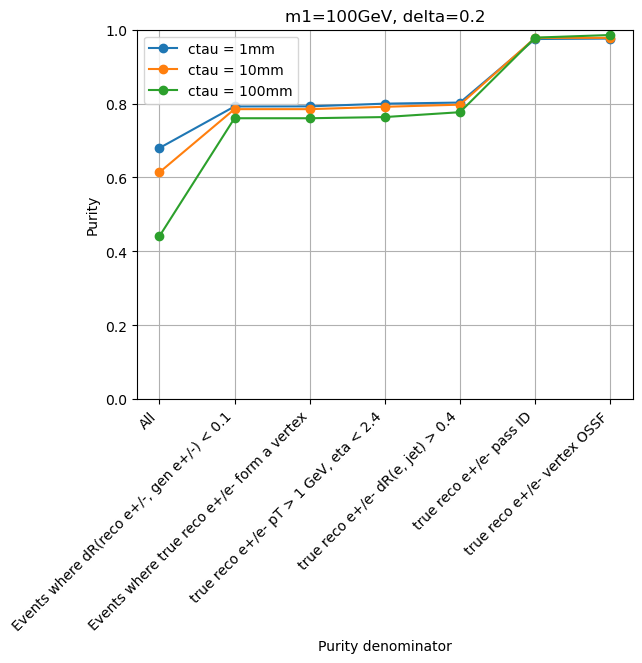

In [49]:
for ct in [1,10,100]:
    plt.plot(range(len(purity[f'ct-{ct}'])), purity[f'ct-{ct}'], '-o', label=f'ctau = {ct}mm')

plt.grid()

plt.ylim([0,1])
plt.xticks(range(len(purity[f'ct-{ct}'])), ['All', \
                                'Events where dR(reco e+/-, gen e+/-) < 0.1', \
                                'Events where true reco e+/e- form a vertex', \
                                'true reco e+/e- pT > 1 GeV, eta < 2.4', \
                                'true reco e+/e- dR(e, jet) > 0.4', \
                                'true reco e+/e- pass ID', \
                                'true reco e+/e- vertex OSSF'
                               ], rotation=45, ha='right')

plt.xlabel('Purity denominator')
plt.ylabel('Purity')

plt.title(f'm1={m1}GeV, delta={delta}')

plt.legend()
plt.show()